In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'BreedName': 'str',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/HeatApproachYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,BreedName,LactationNumber,DaysInMilk,YearSeason,DailyYield,PreviousDailyYield,DailyYieldChange,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,02 SLB,7,191,2022-1,30.77,0.000000,0.000000,35.914865,0.856748,0.000000,0,0,0,0,-3.025000,28.012944
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,02 SLB,7,192,2022-1,48.22,30.770000,8.725000,35.799613,1.103224,0.243718,0,0,0,0,-0.279167,32.898193
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,02 SLB,7,193,2022-1,30.53,39.495000,-2.988333,35.684360,1.023044,-0.083744,0,0,0,0,2.033333,36.760487
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,02 SLB,7,194,2022-1,42.26,36.506667,1.438333,35.569108,1.066796,0.040438,0,0,0,0,0.066667,31.939524
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,02 SLB,7,195,2022-1,38.49,37.945000,0.109000,35.453856,1.073339,0.003074,0,0,0,0,-3.700000,26.498206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483097,2023-06-03,f454e660,SE-fcdf259d-0044-0,4150,41 Fjällko,10,347,2023-3,12.67,14.652000,-0.622000,13.608593,1.030966,-0.045706,0,1,0,0,12.666667,53.132530
483098,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,41 Fjällko,10,348,2023-3,22.31,14.030000,0.954000,13.516773,1.108549,0.070579,0,1,0,0,13.079167,56.726870
483099,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,41 Fjällko,10,349,2023-3,12.84,14.984000,-0.092000,13.424952,1.109278,-0.006853,0,1,0,0,14.237500,58.482418
483100,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,41 Fjällko,10,350,2023-3,9.47,14.892000,-0.284000,13.333131,1.095617,-0.021300,0,1,0,0,15.345833,60.546358


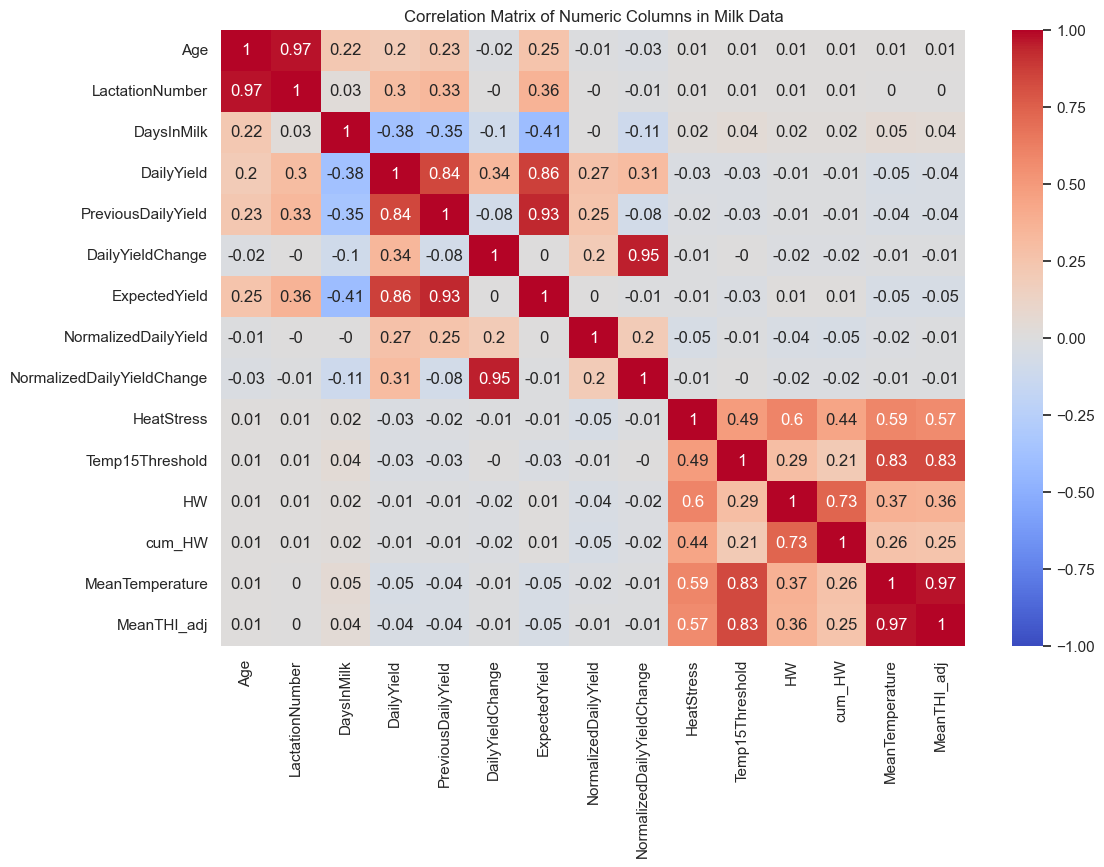

In [3]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

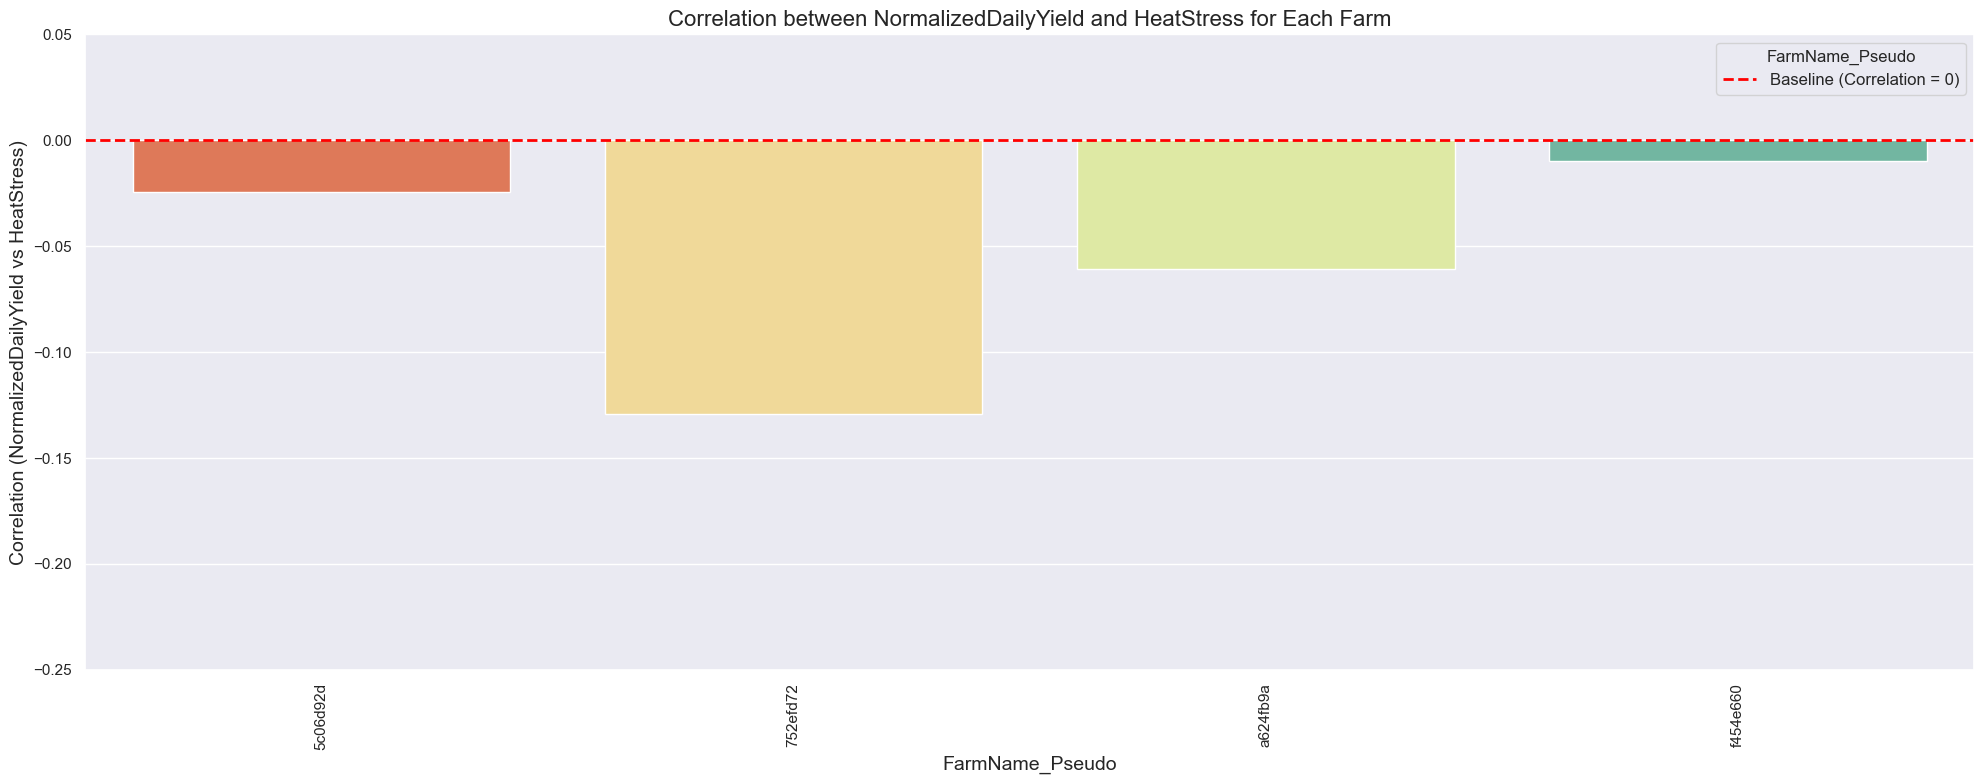

In [4]:
# Calculate correlation manually
grouped = milk_data.groupby('FarmName_Pseudo')
correlations = pd.DataFrame({
    'FarmName_Pseudo': list(grouped.groups.keys()),
    'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
})

# Plotting
plt.figure(figsize=(20, 8))  # Adjust the figure size to zoom out a bit
barplot = sns.barplot(x='FarmName_Pseudo', y='Correlation', data=correlations, palette='Spectral', hue='FarmName_Pseudo', dodge=False, errorbar=None)

# Add baseline line
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Baseline (Correlation = 0)')

# Formatting the plot
plt.xlabel('FarmName_Pseudo', fontsize=14)
plt.ylabel('Correlation (NormalizedDailyYield vs HeatStress)', fontsize=14)
plt.title('Correlation between NormalizedDailyYield and HeatStress for Each Farm', fontsize=16)

plt.ylim(-0.25, 0.05)  # Adjust y-axis limits to show some area above 0
plt.xticks(rotation=90)
plt.legend(fontsize=12, loc='upper right', title='FarmName_Pseudo')
plt.tight_layout()
plt.show()

In [5]:
# Output the correlation values in a nice table format
correlation_table = correlations.sort_values(by='Correlation', ascending=False)
print("\nCorrelation values between NormalizedDailyYield and HeatStress for each Farm:")
print(correlation_table.to_string(index=False))


Correlation values between NormalizedDailyYield and HeatStress for each Farm:
FarmName_Pseudo  Correlation
       f454e660    -0.009639
       5c06d92d    -0.024587
       a624fb9a    -0.060736
       752efd72    -0.129116
